# Section 2. Linear regression

In linear regression, the idea is to select a linear function $f_{\boldsymbol{\theta}}$, whose parameters $\boldsymbol{\theta}$ are identified to fit data by means of the minimization of some error metric between the predictions, i.e., the outputs of the function, and the data. As we will see, linear regression can be formulated as a simple solution of a linear system.

To fix the ideas, let us start by considering a \textit{training} data set, with $n$ data points or \textit{snapshots}, composed of $p$ dependent variables $\mathbf{Y}$ and $m$ independent variables $\mathbf{X}$ 

\begin{equation}
\mathbf{Y} \equiv
\begin{bmatrix}
\mid & \mid & \mid & \mid\\
\mathbf{y}^{(1)} & \mathbf{y}^{(2)} & \cdots & \mathbf{y}^{(n)}\\
\mid & \mid & \mid & \mid
\end{bmatrix}, 
\qquad 
\mathbf{X} \equiv
\begin{bmatrix}
\mid & \mid & \mid & \mid\\
\mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \cdots & \mathbf{x}^{(n)}\\
\mid& \mid & \mid & \mid
\end{bmatrix},
\end{equation}

where $\mathbf{y}^{(k)}$ and $\mathbf{x}^{(k)}$ are the vector collecting the $p$ dependent variables and the $m$ independent variables, respectively, at the $k$-th snapshot of the data set.
In the following, we will consider for simplicity one-dimensional dependent variables, i.e., $p=1$, and we will refer to the vector collecting the snapshots as $\mathbf{y}$. However the entire framework developed herein can be easily formulated in higher dimensions.


To find a best fit line through the training data points, we further assume a linear model -- this is why we call it linear regression --

\begin{equation}
\hat{y} = \theta_0+\theta_1 x_1+\theta_2 x_2+ \cdots + \theta_m x_m ,
\label{eq:linearreg}
\end{equation}

where $\hat{y}$ is the value predicted by the model, $x_k$ is the $k$-th independent variable value, and $\theta_k$ is the $k$-th model parameter -- including the \textit{bias} term, $\theta_0$, and the model's \textit{weights}, $\theta_1, \theta_2, \cdots, \theta_m$. The above equation can be formulated more concisely as

\begin{equation}
\hat{y} = f_{\boldsymbol{\theta}}\left(\mathbf{x}\right)\equiv \boldsymbol{\theta}^{\text{T}} \mathbf{x}^*,
\label{eq:linearreg2}
\end{equation}

where $\boldsymbol{\theta}=\begin{bmatrix}\theta_0, \theta_1, \theta_2, \cdots, \theta_m\end{bmatrix}^\text{T}$ is the vector collecting the model's parameters, $\mathbf{x}^*=\begin{bmatrix} x_0, x_1, x_2, \cdots, x_m\end{bmatrix}^\text{T}$ is the augmented feature vector with $x_0=1$, $f_{\bm{\theta}}\left(\cdot \right)$ is the \textit{hypothesis function} -- a linear function, in this case --, and the superscript $\text{T}$ denotes the transpose operator. To simplify notation, we will just write interchangeably $\mathbf{x}$ for both $\mathbf{x}$ and $\mathbf{x}^*$.

The next step is to identify the parameters $\boldsymbol{\theta}$ such that the linear regression model, $f_{\boldsymbol{\theta}}\left(\mathbf{x}\right)$, best fits the data set $\left(\mathbf{X}, \mathbf{y}\right)$. This operation is called \textit{training}. Training identifies the parameters value that optimize a measure of the \textit{goodness-of-fit}, i.e., how well (or poorly) a model fits the data.

Various objective functions, often referred to as loss functions, can be adopted and their choice strongly determines the subsequent model. Three standard error metrics of hypothesis $f_{\boldsymbol{\theta}}$ on a set $\mathbf{X}$ are often considered which are associated with the $\ell_1$ and $\ell_2$ norms, respectively defined as the mean absolute error (MAE) and the root mean square error (RMSE):

\begin{equation}
\begin{split}
&E_{1}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv \dfrac{1}{n} \sum_{k=1}^{n}\left| f_{\boldsymbol{\theta}}(\mathbf{x}^{(k)}) - y^{(k)}\right| \\
&E_{2}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv \left(\hspace{-0.05cm}\dfrac{1}{n} \sum_{k=1}^{n}\left( \hspace{-0.05cm}f_{\boldsymbol{\theta}}(\mathbf{x}^{(k)}) - y^{(k)}\hspace{-0.05cm}\right)^{\hspace{-0.05cm}2}\hspace{-0.05cm}\right)^{1/2}. 
\end{split}
\end{equation}


One can also broadly define the error based on the $\ell_r$ norm, and namely

\begin{equation}
E_{r}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv \left(\dfrac{1}{n} \sum_{k=1}^{n}\left| f_{\boldsymbol{\theta}}(\mathbf{x}^{(k)}) - y^{(k)}\right|^r\right)^{1/r}.
\end{equation}

The higher the norm index $r$, the more the error metrics focuses on large values and neglect small ones, thus the best fit model intrinsically depends on $r$. In most cases, the differences between models based on different norms are small. However, when there are outliers\footnote{An outlier is an observation that lies an abnormal distance from the other values present in a data set.} in the data, the choice of norm can have a significant impact: for instance, the RMSE is more sensitive to outliers than the MAE.
In linear regression, the most common choice is the root mean square error, but in practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root). The MSE of a linear regression hypothesis $f_{\boldsymbol{\theta}}$ on a set $\mathbf{X}$ is calculated as 

\begin{equation}
\text{MSE}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv E_{2}^2\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  = \dfrac{1}{n} \sum_{k=1}^{n}\left( \boldsymbol{\theta}^{\text{T}}\mathbf{x}^{(k)} - y^{(k)}\right)^2.
\end{equation}

Once the loss function is defined, MSE in our case, training requires to find the parameters $\boldsymbol{\theta}$ that minimize that particular loss. This requires differentiation with respect to $\boldsymbol{\theta}$ to identify the value of the latter such that a minimum of the error occurs -- that is, find those $\boldsymbol{\theta}$ for which $\partial \text{MSE}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right) /\partial \boldsymbol{\theta} = 0$.

Note that, although a zero derivative denotes either a minimum or a maximum, we know this must be a minimum of the error since there is no maximum error, i.e., we can always find a model that has a larger error.

Following the above procedure, the values of the parameters for which the error is minimum, $\hat{\boldsymbol{\theta}}$, are the solution of the following linear system of equations
\begin{equation}
\mathbf{X}^{\text{T}}\mathbf{X}\hat{\boldsymbol{\theta}}^{\text{T}} = \mathbf{X}^{\text{T}}\mathbf{y}.
\label{eq:linear}
\end{equation}
If the matrix $\mathbf{X}^{\text{T}}\mathbf{X}$ is square and invertible (i.e., it has nonzero determinant), then there exists a unique solution $\hat{\boldsymbol{\theta}}$ which is given by the \textit{normal equation},
\begin{equation}
\hat{\boldsymbol{\theta}}^{\text{T}} = \left(\mathbf{X}^{\text{T}}\mathbf{X}\right)^{-1} \mathbf{X}^{\text{T}}\mathbf{y}.
\label{eq:normal}
\end{equation}


However, when $\mathbf{X}^{\text{T}}\mathbf{X}$ is singular, the normal equation does not hold. An alternative way to solve the above equation consists of using the Moose-Penrose pseudoinverse $\mathbf{X}^{+}$ of $\mathbf{X}$ to obtain the general and unique solution

\begin{equation}
\hat{\boldsymbol{\theta}} = \mathbf{X}^{+} \mathbf{y},
\end{equation}

where we have used the commutative property $\left(\mathbf{X}^{\hspace{-0.025cm}+}\right)^{\text{T}} = \left(\mathbf{X}^{\text{T}}\right)^{\hspace{-0.025cm}+}$.

The pseudoinverse is computed using the matrix factorization technique called singular value decomposition that can decompose the independent variables matrix $\mathbf{X}$ into the multiplication of three matrices $\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^{\text{T}}$. The pseudoinverse is computed as $\mathbf{X} = \mathbf{V}\boldsymbol{\Sigma}^{\hspace{-0.025cm}+}\mathbf{ U }$. To compute the matrix $\boldsymbol{\Sigma}^{\hspace{-0.025cm}+}$, the algorithm takes $\boldsymbol{\Sigma}$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

With all the ingredients in our hands, is time to move to a concrete example.

## Example

Let consider fitting the following data set generated by the function

\begin{equation}
y = \alpha_2 \exp \left(\alpha_1 x +\mathcal{U}\left(-1,1\right)\right), \quad \alpha_1= 1, \; \alpha_2 = e,
\label{eq:ex1a}
\end{equation}

which is obviously nonlinear. $\mathcal{U}\left(-1,1\right)$ is a uniformly distributed random variable that lies between $-1$ and $1$. The snippet hereinafter generates our data set:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

n_snapshots = 200 # set number of snapshots: n
a_1 = 1.; a_2 = np.exp(1) # set coefficients
noise = np.random.uniform(-1,1,(n_snapshots,1)) # generate Gaussian noise
X = np.random.uniform(0,4.,(n_snapshots,1)) # generate independent variable X
y = a_2*np.exp(a_1*X+noise) # compute dependent variable y

In [4]:
X_p = np.c_[np.ones((n_snapshots, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T).dot(y)
print(theta_best) # parameters

[[-16.93873601]
 [ 28.05702557]]


In [5]:
y.shape

(200, 1)

In [6]:
X_new = np.array([[0],[4]])
X_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_b.dot(theta_best)

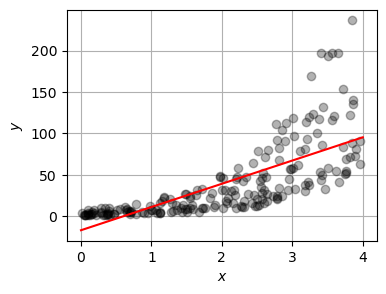

In [7]:
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y,'ko',alpha=0.3)
plt.plot(X_new, y_predict,'r-')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()

In [8]:
y_prime = np.log(y) # change of coordinate, y' = ln(y)
X_b = np.c_[np.ones((n_snapshots, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_prime)
X_new = np.array([[0],[4]])
X_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_b.dot(theta_best) # parameters
print(theta_best)

[[0.99530983]
 [0.98646971]]


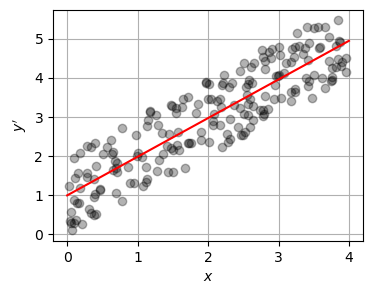

In [9]:
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, y_predict,'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression() # create linear regression object
regr.fit(X, y_prime) # train the model
y_predict = regr.predict(X) # make predictions
print("Parameters: ", regr.intercept_,regr.coef_) # parameters
print("Mean squared error: %.4f" % mean_squared_error(y_prime,y_predict)) # compute MSE

Parameters:  [0.99530983] [[0.98646971]]
Mean squared error: 0.3459


### Gradient descent

In [11]:
eta = 0.05 # learning rate
n_epochs = 500 # no epochs
theta = np.array([[0.],[0.]]) # initialization
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    gradients = 2/n_snapshots * X_p.T.dot(X_p.dot(theta) - y_prime) # Eq. (15)
    theta = theta - eta * gradients # optimizer Eq. (14)
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.99530187]
 [0.98647279]]


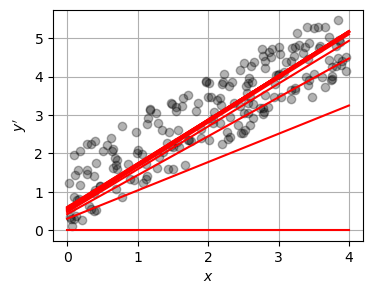

In [12]:
k=15
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

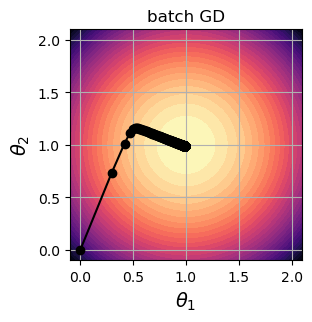

In [13]:
# Plot loss function (MSE)
x = np.linspace(-0.1,2.1,1000)
y = np.linspace(-0.1,2.1)
a,b = np.meshgrid(x,y)
z = (a-1)**2+(b-1)**2

fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('batch GD')
plt.show()

In [14]:
eta = 0.05 #learning rate
n_epochs = 20 # no epochs
theta = np.array([[0],[0.]]) #initialization
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    for i in range(n_snapshots): # iterate over each snapshot
        random_index = np.random.randint(n_snapshots) # pick random snapshot
        xi = X_p[random_index:random_index+1]
        yi = y_prime[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # Eq. (15)
        theta = theta - eta * gradients # Eq. (14)
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.83905266]
 [1.15041967]]


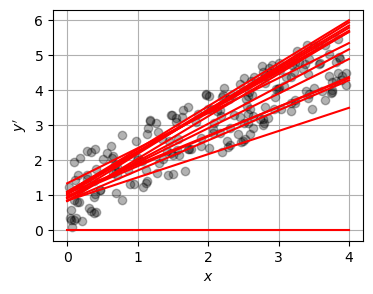

In [15]:
k=15
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

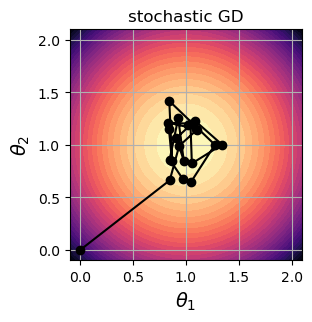

In [16]:
fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('stochastic GD')
plt.show()

In [17]:
theta = np.array([[0],[0.]]) #initialization
t0, t1 = 1, 100 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    for i in range(n_snapshots):
        random_index = np.random.randint(n_snapshots)
        xi = X_p[random_index:random_index+1]
        yi = y_prime[random_index:random_index+1]
        eta = learning_schedule(epoch * n_snapshots + i) # schedule
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.90607535]
 [1.02276101]]


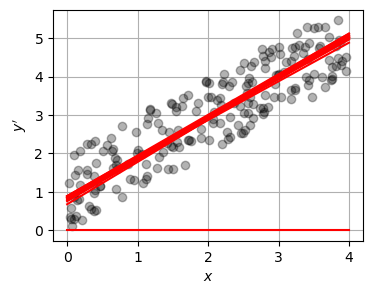

In [18]:
k=15
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

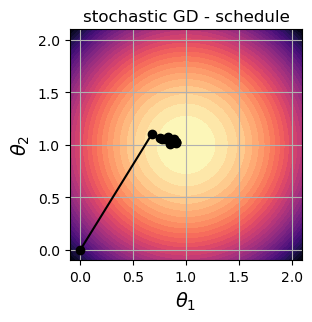

In [19]:
fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('stochastic GD - schedule')
plt.show()

In [20]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    '''Function to iterate over mini-batches
    :param inputs: independent variable
    :type inputs:  numpy array
    :param targets: dependent variable
    :type targets:  numpy array
    :param batchsize: mini-batch size
    :type batchsize:  integer
    :param shuffle: shuffle mini-batches
    :type shuffle:  bool

    :return: mini-batches of inputs and targets
    :rtype: list of numpy arrays
    '''
    # Check if number of samples in inputs and targets are equal
    assert inputs.shape[0] == targets.shape[0]  
    
    if shuffle:
        indices = np.arange(inputs.shape[0])  # Generate array of indices
        np.random.shuffle(indices)  # Shuffle the indices

    # Iterate over mini-batches
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]  # subset of shuffled indices
        else:
            excerpt = slice(start_idx, start_idx + batchsize)  # slice to select samples

        yield inputs[excerpt], targets[excerpt]  # Return mini-batches as a generator object
        
eta = 0.05 #learning rate
theta = np.array([[0],[0.]]) #initialization
batch_size = 30 # define mini-batches size
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    for batch in iterate_minibatches(X_p, y_prime, batch_size, shuffle=True):
        x_batch, y_batch = batch
        gradients = 2/batch_size * x_batch.T.dot(x_batch.dot(theta) - y_batch)
        theta = theta - eta * gradients   
        
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.94862053]
 [0.96679924]]


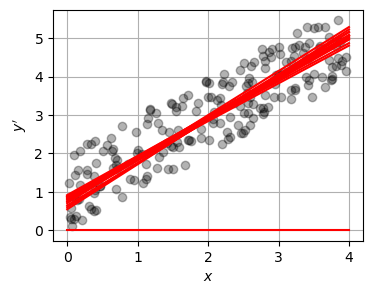

In [21]:
k=15
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

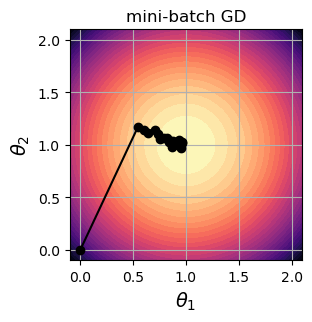

In [22]:
fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('mini-batch GD')
plt.show()

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=20, tol=1e-3, penalty=None, eta0=eta)
for epoch in range(n_epochs):
    for batch in iterate_minibatches(X_p, y_prime, batch_size, shuffle=True):
        x_batch, y_batch = batch
        sgd_reg.partial_fit(X, y_prime.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[0.9883169] [0.96759417]


In [24]:
1/0

ZeroDivisionError: division by zero

In [ ]:
import matplotlib
plt.style.use('classic')

font = {#'family' : 'CMU',
#         'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


In [ ]:
hist3=hist

In [ ]:

x = np.linspace(-5,5,1000)
y = np.linspace(-5,5)
a,b = np.meshgrid(x,y)
z = (a-1)**2+(b-1)**2

In [ ]:
x = np.linspace(-0.2,2.2,1000)
y = np.linspace(-0.2,2.2)
a,b = np.meshgrid(x,y)
z = (a-1)**2+(b-1)**2
fig = plt.figure(dpi=100, figsize=(3, 3), tight_layout=True)
ax = fig.subplots(1)
c=-1
ax.plot(hist3[0,:],hist3[1,:],linewidth=0.5,markersize=4,marker='o',color='black',linestyle='-',label="predictions",markeredgecolor='black')
ax.contourf(a, b, z, 15, cmap='binary')#colors='k')#
ax.set_ylabel("$\\theta_2$",fontsize="14")
ax.set_xlabel("$\\theta_1$",fontsize="14")
ax.grid()
ax.set_ylim(-0.1,2.1)
ax.set_xlim(-0.1,2.1)
ax.set_title('$\eta=0.005$')
# ax.legend(loc='best',fontsize="10")
fig.savefig(f"./plotlowtheta_.pdf", format="pdf", transparent=True)

fig.patch.set_facecolor('white')

In [ ]:
fig = plt.figure(dpi=100, figsize=(3, 3), tight_layout=True)
ax = fig.subplots(1)
c=-1
ax.plot(hist2[0,:],hist2[1,:],linewidth=0.5,markersize=4,marker='o',color='black',linestyle='-',label="predictions",markeredgecolor='black')
ax.contourf(a, b, z, 15, cmap='binary')#colors='k')#
ax.set_ylabel("$\\theta_2$",fontsize="14")
ax.set_xlabel("$\\theta_1$",fontsize="14")
ax.grid()
ax.set_ylim(-0.1,2.1)
ax.set_xlim(-0.1,2.1)
ax.set_title('$\eta=0.03$')
# ax.legend(loc='best',fontsize="10")
fig.savefig(f"./plottheta_.pdf", format="pdf", transparent=True)

fig.patch.set_facecolor('white')

In [ ]:
fig = plt.figure(dpi=100, figsize=(3, 3), tight_layout=True)
ax = fig.subplots(1)
c=-1
ax.plot(hist1[0,:],hist1[1,:],linewidth=0.5,markersize=4,marker='o',color='black',linestyle='-',label="predictions",markeredgecolor='black')
ax.contourf(a, b, z, 15, cmap='binary')#colors='k')#
ax.set_ylabel("$\\theta_2$",fontsize="14")
ax.set_xlabel("$\\theta_1$",fontsize="14")
ax.grid()
ax.set_ylim(-0.1,2.1)
ax.set_xlim(-0.1,2.1)
ax.set_title('$\eta=0.15$')
# ax.legend(loc='best',fontsize="10")
fig.savefig(f"./plothightheta_.pdf", format="pdf", transparent=True)

fig.patch.set_facecolor('white')

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
# random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
n_epochs = 50
# t0, t1 = 1, 20 # learning schedule hyperparameters
# def learning_schedule(t):
#     return t0 / (t + t1)


theta = np.array([[0],[0.]])
hist = theta
X_new = np.array([[0],[4]])
line2 = theta[0]+theta[1]*X_new
line = X_b.dot(theta)
eta=0.05
# random initialization
for epoch in range(n_epochs):
    for i in range(n_snapshots):
        random_index = np.random.randint(n_snapshots)
        xi = X_b[random_index:random_index+1]
        yi = y_prime[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
#         eta = learning_schedule(epoch * n_snapshots + i)
        theta = theta - eta * gradients
    hist = np.concatenate((hist,theta),1)
    line2 = np.concatenate((line2, theta[0]+theta[1]*X_new),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
        
        
theta

In [ ]:
n_epochs = 50
t0, t1 = 1, 100 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)


theta = np.array([[0],[0.]])
hist = theta
X_new = np.array([[0],[4]])
line2 = theta[0]+theta[1]*X_new
line = X_b.dot(theta)
# eta=0.05
# random initialization
for epoch in range(n_epochs):
    for i in range(n_snapshots):
        random_index = np.random.randint(n_snapshots)
        xi = X_b[random_index:random_index+1]
        yi = y_prime[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n_snapshots + i)
        theta = theta - eta * gradients
    hist = np.concatenate((hist,theta),1)
    line2 = np.concatenate((line2, theta[0]+theta[1]*X_new),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
        
        
theta

In [ ]:
fig = plt.figure(dpi=100, figsize=(3, 3), tight_layout=True)
ax = fig.subplots(1)
# plt.style.use('_mpl-gallery')
ax.plot(X, y_prime,'o',color='black',alpha=0.35,markersize=6)
ax.plot(X_new, line2[:,:10],linewidth=1,markersize=0,color='red',linestyle='-',label="predictions")
ax.plot(X_new, line2[:,0],linewidth=2,markersize=0,color='red',alpha=1,linestyle='-',label="predictions")
# ax.plot(X_new, line2[:,-1],linewidth=2,markersize=0,color='red',linestyle='-',label="predictions")
ax.set_ylabel("$y'=\ln(y)$",fontsize="14")
ax.set_xlabel("$x$",fontsize="14")
ax.grid()
ax.set_ylim(-0.1,6)
ax.set_title('$\eta=0.03$')
# ax.legend(loc='best',fontsize="10")
fig.patch.set_facecolor('white')
fig.savefig(f"./plottheta_stochastic.pdf", format="pdf", transparent=True)

In [ ]:

x = np.linspace(-0.1,2.1,1000)
y = np.linspace(-0.1,2.1)
a,b = np.meshgrid(x,y)
z = (a-1)**2+(b-1)**2

In [ ]:
fig = plt.figure(dpi=100, figsize=(3, 3), tight_layout=True)
ax = fig.subplots(1)
c=-1
ax.plot(hist[0,:],hist[1,:],linewidth=0.5,markersize=4,marker='o',color='black',linestyle='-',label="predictions",markeredgecolor='black')
ax.contourf(a, b, z, 15, cmap='binary')#colors='k')#
ax.set_ylabel("$\\theta_2$",fontsize="14")
ax.set_xlabel("$\\theta_1$",fontsize="14")
ax.grid()
ax.set_ylim(-0.1,2.1)
ax.set_xlim(-0.1,2.1)
ax.set_title('$\eta=0.03$')
# ax.legend(loc='best',fontsize="10")
fig.savefig(f"./plotthetastochastic_.pdf", format="pdf", transparent=True)

fig.patch.set_facecolor('white')

In [ ]:
eta = 0.03 # learning rate
n_epochs = 200
theta = np.array([[0],[0.]])
hist = theta
X_new = np.array([[0],[4]])
line2 = theta[0]+theta[1]*X_new
line = X_b.dot(theta)
print(y_prime.shape)
print(line.shape)
for epoch in range(n_epochs):
#     print(y_prime.shape,X_b.shape)
    gradients = 2/n_snapshots * X_b.T.dot(X_b.dot(theta) - y_prime)
    theta = theta - eta * gradients
    hist = np.concatenate((hist,theta),1)
    line2 = np.concatenate((line2, theta[0]+theta[1]*X_new),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
    
    
theta






In [ ]:
n_epochs = 200
t0, t1 = 1, 20 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.array([[0.1],[0.1]])
hist = theta
X_new = np.array([[0],[4]])
line2 = theta[0]+theta[1]*X_new
line = X_b.dot(theta)

# theta = np.random.randn(2,1)
# random initialization
for epoch in range(n_epochs):
    for i in range(n_snapshots):
        random_index = np.random.randint(n_snapshots)
        xi = X_b[random_index:random_index+1]
        yi = y_prime[random_index:random_index+1]
#         print(xi.shape,yi.shape)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = 0.001#learning_schedule(epoch * n_snapshots + i)
        theta = theta - eta * gradients
    hist = np.concatenate((hist,theta),1)
    line2 = np.concatenate((line2, theta[0]+theta[1]*X_new),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
#         print(theta)

In [ ]:
theta

In [ ]:
x = np.linspace(-0,2,1000)
y = np.linspace(-0,2)
a,b = np.meshgrid(x,y)
z = (a-1)**2+(b-1)**2
fig = plt.figure(dpi=100, figsize=(3, 3), tight_layout=True)
ax = fig.subplots(1)
c=-1
# plt.style.use('_mpl-gallery')
# ax.plot(hist1[0,:4],hist1[1,:4],linewidth=1,markersize=5,marker='o',color='red',linestyle='-',label="predictions")
ax.plot(hist[0,:c],hist[1,:c],linewidth=0.5,markersize=3,marker='o',color='black',linestyle='-',label="predictions")
# ax.plot(hist3[0,:],hist3[1,:],linewidth=1,markersize=0,marker='o',color='blue',linestyle='-',label="predictions")
ax.contourf(a, b, z, 15, cmap='binary')#colors='k')#
ax.set_ylabel("$\\theta_2$",fontsize="14")
ax.set_xlabel("$\\theta_1$",fontsize="14")
ax.grid()
# ax.set_ylim(0.95,1.05)
# ax.set_xlim(0.85,1.05)
ax.set_title('$\eta=0.005$')
# ax.legend(loc='best',fontsize="10")
fig.savefig(f"./plot3.pdf", format="pdf", transparent=True)

fig.patch.set_facecolor('white')

In [ ]:
n_epochs = 300
t0, t1 = 1, 10 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.array([[0.1],[0.1]])
hist = theta
X_new = np.array([[0],[4]])
line2 = theta[0]+theta[1]*X_new
line = X_b.dot(theta)
mini_batch=1
# theta = np.random.randn(2,1)
# random initialization
for epoch in range(n_epochs):
    for i in range(n_snapshots//mini_batch):
        random_index = np.random.randint(n_snapshots)
        xi = X_b[random_index:random_index+mini_batch]
        yi = y_prime[random_index:random_index+mini_batch]
#         print(xi.shape,yi.shape)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n_snapshots + i)
        theta = theta - eta * gradients
    hist = np.concatenate((hist,theta),1)
    line2 = np.concatenate((line2, theta[0]+theta[1]*X_new),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
#         print(theta)

In [ ]:
x = np.linspace(-0,2,1000)
y = np.linspace(-0,2)
a,b = np.meshgrid(x,y)
z = (a-1)**2+(b-1)**2
fig = plt.figure(dpi=100, figsize=(3, 3), tight_layout=True)
ax = fig.subplots(1)
c=-1
# plt.style.use('_mpl-gallery')
# ax.plot(hist1[0,:4],hist1[1,:4],linewidth=1,markersize=5,marker='o',color='red',linestyle='-',label="predictions")
ax.plot(hist[0,:c],hist[1,:c],linewidth=0.5,markersize=3,marker='o',color='black',linestyle='-',label="predictions")
# ax.plot(hist3[0,:],hist3[1,:],linewidth=1,markersize=0,marker='o',color='blue',linestyle='-',label="predictions")
ax.contourf(a, b, z, 15, cmap='binary')#colors='k')#
ax.set_ylabel("$\\theta_2$",fontsize="14")
ax.set_xlabel("$\\theta_1$",fontsize="14")
ax.grid()
# ax.set_ylim(0.95,1.05)
# ax.set_xlim(0.85,1.05)
ax.set_title('$\eta=0.005$')
# ax.legend(loc='best',fontsize="10")
fig.savefig(f"./plot3.pdf", format="pdf", transparent=True)

fig.patch.set_facecolor('white')

In [ ]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
# start = timer()
regr.fit(X, y_)
# end =timer()
# print(end - start)
# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print("Coefficients: \n", regr.intercept_,regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_, y_pred))


In [ ]:
fig = plt.figure(dpi=100, figsize=(4, 3), tight_layout=True)
ax = fig.subplots(1)
# plt.style.use('_mpl-gallery')
ax.plot(X, y_,'o',color='black',alpha=0.5,markersize=6)
ax.plot(X, y_pred,linewidth=3,markersize=0,color='red',linestyle='-',label="predictions")
ax.set_ylabel('$y$',fontsize="12")
ax.set_xlabel('$x$',fontsize="12")
ax.grid()
ax.legend(loc='best',fontsize="9")
fig.patch.set_facecolor('white')
fig.savefig(f"./plot2.pdf", format="pdf", transparent=True)


In [ ]:
fig = plt.figure(dpi=100, figsize=(3, 2), tight_layout=True)
ax = fig.subplots(1)
t = np.linspace(-20,10,1000)

import torch
relu = torch.nn.Softplus(beta=1., threshold=1000)
v = relu(torch.from_numpy(t)).numpy()
# x0,y0=0,0
# g=9.81
# v = 0.5+np.sin(t)
# plt.style.use('_mpl-gallery')
ax.plot(-t,-v,linewidth=3,markersize=0,marker='o',color='black',linestyle='-',label="predictions")
ax.set_ylabel("$u^{(0)}$",fontsize="14")
ax.set_xlabel("$x$",fontsize="14")
ax.grid()
ax.set_ylim(-10,2)
fig.savefig(f"./plot1.pdf", format="pdf", transparent=True)
fig.patch.set_facecolor('white')

In [ ]:
fig = plt.figure(dpi=100, figsize=(3, 2), tight_layout=True)
ax = fig.subplots(1)
ax.plot(-t,-v+np.sin(1.25*t),linewidth=3,markersize=0,marker='o',color='black',linestyle='-',label="predictions")
ax.set_ylabel("$u^{\epsilon}$",fontsize="14")
ax.set_xlabel("$x^{\epsilon}$",fontsize="14")
ax.grid()
ax.set_ylim(-10,2)
fig.savefig(f"./plot2.pdf", format="pdf", transparent=True)
fig.patch.set_facecolor('white')

In [ ]:
fig = plt.figure(dpi=100, figsize=(2.5, 1.5), tight_layout=True)
ax = fig.subplots(1)
tt = np.linspace(-np.pi,np.pi,100)
ax.plot(-tt,np.sin(1.25*tt),linewidth=3,markersize=0,marker='o',color='black',linestyle='-',label="predictions")
ax.set_ylabel("$u^{(1)} \\times 1/\epsilon$",fontsize="14")
ax.set_xlabel("$y$",fontsize="14")
ax.grid()
ax.set_xlim(-3,3)
ax.set_ylim(-1.2,1.2)
fig.savefig(f"./plot3.pdf", format="pdf", transparent=True)
fig.patch.set_facecolor('white')

In [ ]:
import numpy as np
m=25
X_max = np.zeros((m,1))
y_max = np.zeros(m)
for i in np.arange(0,m):
    data = np.genfromtxt('TMD-all/TMD'+str(i+1)+'.dat',
                     skip_header=2,
                     delimiter='', dtype=None,
                     usecols=np.arange(0,8))
#     if i==0:
    X = data[:,6]
#     y = data[:,5]
#     print(np.where(X==np.amax(X))[0])
    max = np.where(X==np.amax(X))[0]
    if len(max)==1:
        X_max[i,0] = X[max]
#         X_max[i,1] = data[0,5]
        y_max[i] = data[max,5]
    else:
        X_max[i] = X[max[0]]
#         X_max[i,1] = data[0,4]
        y_max[i] = data[max[0],5]
#     y_max[i] = y[np.where(X==np.amax(X))[0]]
#     print(X_max[i],y_max[i])
#         X = np.expand_dims(np.amax(data[:n,6],1)
#         y = np.expand_dims(data[:n,5],1)
#     else:
#         X = np.concatenate((X,
#                             np.expand_dims(data[:n,6],1)),1)
#         y = np.concatenate((y,
#                             np.expand_dims(data[:n,5],1)),1)

In [ ]:
# plt.plot(X_max[:,0],y_max[:],X_max[:,1],'.')

%matplotlib notebook
ax = plt.figure(figsize=(3.5,3.5)).add_subplot(projection='3d')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# for i in range(increments//n_reset):
ax.plot(X_max[:,0],
#         X_max[:,1],
        y_max[:],
        alpha=1.,
        linewidth=0.,marker='o', markersize=2,label='ref',color='red')
# plt.plot(0.,0.)
ax.set_ylabel('$B$')
ax.set_xlabel('$p$')
ax.set_zlabel('$q$')
# ax.set_ylim(-15,15)
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.5)
plt.show()

In [ ]:
# X, Y = np.meshgrid(X, y)


In [ ]:
# X


In [ ]:
X_max.shape

In [ ]:
%matplotlib inline
plt.plot(X_max[:,0],y_max,'.')

plt.show()


In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X=np.vstack((X_max[:5],X_max[20:25]))#.copy()
y=np.hstack((y_max[:5],y_max[20:25]))
# Create linear regression object
regr = linear_model.Ridge(alpha=1)#linear_model.LinearRegression()
regr.fit(X, y)
y_predict =  regr.predict(X_max)

In [ ]:
%matplotlib inline
plt.plot(X_max[:],y_max,color='black',linewidth=0,marker='o')
plt.plot(X_max[:],y_predict,color="blue", linewidth=2)

plt.show()


In [ ]:
# The coefficients
print("Coefficients: \n", regr.intercept_,regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_max, y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_max, y_predict))

In [ ]:
# xx1.shape,xx2.shape

In [ ]:
# X_b_new = np.concatenate((np.ones((m,1)),),1)

In [ ]:
%matplotlib inline
plt.plot(X_max[:,0],y_max,color='black',linewidth=0,marker='o')
plt.plot(X_max[:,0],y_predict,color="blue", linewidth=2)

plt.show()


In [ ]:
plt.plot(X_max[:,0],y_max[:],X_max[:,1],'.')

%matplotlib notebook
ax = plt.figure(figsize=(3.5,3.5)).add_subplot(projection='3d')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# for i in range(increments//n_reset):
ax.plot(X_max[:,0],
        X_max[:,1],
        y_max[:],
        alpha=1.,
        linewidth=0.,marker='o', markersize=5,label='ref',color='red')
ax.plot(X_max[:,0],
        X_max[:,1],
        y_predict[:],
        alpha=1.,
        linewidth=0.,marker='o', markersize=2,label='ref',color='blue')
# plt.plot(0.,0.)
ax.set_ylabel('$B$')
ax.set_xlabel('$p$')
ax.set_zlabel('$q$')
# ax.set_ylim(-15,15)
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.5)
plt.show()

In [ ]:
# fig = plt.figure(dpi=100, figsize=(4, 3), tight_layout=True)
# ax = fig.subplots(1)

fig = plt.figure(dpi=100, figsize=(3, 2), tight_layout=True)
ax = fig.subplots(1)
m=25
X_max = np.zeros((m,1))
y_max = np.zeros(m)
for i in np.arange(0,m):
    data = np.genfromtxt('TMD-all/TMD'+str(i+1)+'.dat',
                     skip_header=2,
                     delimiter='', dtype=None,
                     usecols=np.arange(0,8))
    if i==4 or i==9 or i==14 or i==24:
        color='black'
        marker='o'
#     elif i<10:
#         color='blue'
#     elif i<15:
#         color='red'
#         marker='s'

        ax.plot(data[:,0],data[:,-2],color=color,alpha=1,linewidth=2)
#     ax1.plot(data[:,0],data[:,5],color=color,alpha=1,markersize=0,linewidth=2)
#     ax.plot(X_new, y_predict,linewidth=3,markersize=0,color='red',linestyle='-',label="predictions")
ax.set_ylabel('$q$',fontsize="12")
ax.set_xlabel('$\\varepsilon_{11}$',fontsize="12")
ax.grid()
ax.set_ylim(400,900)
ax.set_xlim(0,20)
# ax.legend(loc='best',fontsize="9")
# ax.set_ylim(0,5)
fig.patch.set_facecolor('white')
fig.savefig(f"./plot3.pdf", format="pdf", transparent=True)

# ax1.set_ylabel('$y$',fontsize="12")
# ax1.set_xlabel('$x$',fontsize="12")
# ax1.grid()
# ax1.legend(loc='best',fontsize="9")
# fig1.patch.set_facecolor('white')
# plt.show()

In [ ]:
# m=5
X_max = np.zeros((m,1))
y_max = np.zeros(m)
for i in np.arange(0,m):
    data = np.genfromtxt('TMD-all/TMD'+str(i+1)+'.dat',
                     skip_header=2,
                     delimiter='', dtype=None,
                     usecols=np.arange(0,8))
    plt.plot(data[:,6],data[:,5],marker='.',color='black',alpha=0.2,linewidth=0)
plt.show()

In [ ]:
x = np.linspace(0, 10, 6)  # [0, 2,..,10] : 6 distinct values
y = np.linspace(0, 20, 5)  # [0, 5,..,20] : 5 distinct values
z = np.linspace(0, 100, 30)  # 6 * 5 = 30 values, 1 for each possible combination of (x,y)

X, Y = np.meshgrid(x, y)
Z = np.reshape(z, X.shape)  # Z.shape must be equal to X.shape = Y.shape
Z.shape

In [ ]:
Id0 = np.array([0.15,
0.21,
0.21,
0.22,
0.25,
0.46,
0.51,
0.52,
0.55,
0.55,
0.57,
0.63,
0.63,
0.64,
0.68,
0.82,
0.79,
0.81,
0.85,
0.80,
0.85,
0.85,
0.92,
0.95,
0.89])

In [ ]:
import numpy as np
m=25

X_max = np.zeros((m,1))
y_max = np.zeros(m)
for i in np.arange(0,m):
    data = np.genfromtxt('TMD-all/TMD'+str(i+1)+'.dat',
                     skip_header=2,
                     delimiter='', dtype=None,
                     usecols=np.arange(0,8))
#     if i==0 or i==4 or i==9 or i==14 or i==19 or i==24 
#     if not i%5:
#         ss = 50.
#         k=0
#     else:
#         k+=1
#     if k==1:
#         ss =100.
#     if k==2:
#         ss=200.
#     if k==3:
#         ss=300.
#     if k==4:
#         ss=400.
#     print(ss)   
    X = data[:,-1]#/ss
    idx=np.where(data[:,0]>=25.)
#     print(len(idx[0]))
    if len(idx[0])>=1:
        idx = idx[0][0]
#         print(idx)
    else:
        idx=-1
             #     max = np.where(X==np.amax(X))[0]
#     if len(max)==1:
#         X_max[i,0] = X[max]
    X_max[i,0] = Id0[i]
#     y_max[i] = np.degrees(np.arctan((X[idx])))
    y_max[i] = np.amax(X)
#     else:
# #         X_max[i,0] = X[max[0]]
#         X_max[i,0] = Id0[i]
#         y_max[i] = data[max[0],5]
# idx = i  
# for k in np.arange(10,15):
#     data = np.genfromtxt('TMD-all/TMD'+str(i+1)+'.dat',
#                      skip_header=2,
#                      delimiter='', dtype=None,
#                      usecols=np.arange(0,8))
#     X = data[:,6]
#     max = np.where(X==np.amax(X))[0]
#     if len(max)==1:
#         X_max[idx+i,0] = X[max]
#         X_max[idx+i,1] = Id0[idx+i]
#         y_max[idx+i] = data[max,5]
#     else:
#         X_max[idx+i] = X[max[0]]
#         X_max[idx+i,1] = Id0[idx+i]
#         y_max[idx+i] = data[max[0],5]


In [ ]:
fig = plt.figure(dpi=100, figsize=(4, 3), tight_layout=True)
ax = fig.subplots(1)
ax.plot(X_max[:,0],y_max,'o',color='red',alpha=1,markersize=4)
ax.set_ylabel('$y$',fontsize="12")
ax.set_xlabel('$x$',fontsize="12")
ax.grid()
ax.legend(loc='best',fontsize="9")
# ax.set_ylim(1.3,1.8)
fig.patch.set_facecolor('white')

In [ ]:
X_max[:,0],y_max

In [ ]:

X=np.vstack((X_max[:5],X_max[20:25]))#.copy()
y=np.hstack((y_max[:5],y_max[20:25]))

# X = X_max[:5]
# y = y_max[:5]

In [ ]:
X.shape

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# X=X_max.copy()
# y=y_max.copy()
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predict =  regr.predict(X_max)

In [ ]:
# # plt.plot(X_max[:,0],y_max[:],X_max[:,1],'.')

# %matplotlib notebook
# ax = plt.figure(figsize=(3.5,3.5)).add_subplot(projection='3d')
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# # make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# # for i in range(increments//n_reset):

# ax.plot_trisurf(X_max[:,0],
#         X_max[:,1],
#         y_predict[:],
# #         cmap='hot',
#         antialiased=True,
#                 edgecolor='none',linewidth=2,alpha=0.5)
# ax.plot(X_max[:,0],
#         X_max[:,1],
#         y_max[:],
#         alpha=1.,
#         linewidth=0.,marker='o', markersize=5,label='ref',color='red')# plt.plot(0.,0.)
# ax.set_ylabel('$B$')
# ax.set_xlabel('$p$')
# ax.set_zlabel('$q$')
# # ax.set_ylim(-15,15)
# plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.5)
# plt.show()

In [ ]:
# fig = plt.figure(dpi=100, figsize=(4, 3), tight_layout=True)
# ax = fig.subplots(1)
# ax.plot(X_max[:,0],y_max,'o',color='red',alpha=1,markersize=4)
# ax.set_ylabel('$y$',fontsize="12")
# ax.set_xlabel('$x$',fontsize="12")
# ax.grid()
# ax.legend(loc='best',fontsize="9")
# # ax.set_ylim(1.3,1.8)
# fig.patch.set_facecolor('white')

fig = plt.figure(dpi=100, figsize=(4, 3), tight_layout=True)
ax = fig.subplots(1)
# plt.style.use('_mpl-gallery')
ax.plot(X, y,'o',color='red',alpha=0.9,marker='s',markersize=6)
ax.plot(X_max[5:], y_max[5:],'o',color='black',alpha=0.9,markersize=6)
ax.plot(X_max, y_predict,linewidth=3,markersize=0,color='red',linestyle='-',label="predictions")
ax.set_ylabel('$y$',fontsize="12")
ax.set_xlabel('$x$',fontsize="12")
ax.grid()
ax.set_ylim(1.3,1.8)
ax.legend(loc='best',fontsize="9")
fig.patch.set_facecolor('white')
fig.savefig(f"./plot2.pdf", format="pdf", transparent=True)


In [ ]:
# The coefficients
print("Coefficients: \n", regr.intercept_,regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_max, y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_max, y_predict))

In [ ]:
n_snapshots=100
t = np.linspace(0,2,n_snapshots)
t = np.expand_dims(t,1)
x = -0.5*t**2+0.005*np.random.normal(0,1,(n_snapshots,1))

In [ ]:
fig = plt.figure(dpi=100, figsize=(4, 3), tight_layout=True)
ax = fig.subplots(1)
# plt.style.use('_mpl-gallery')
ax.plot(t,x,'o',color='red',alpha=0.9,marker='s',markersize=6)
# ax.plot(X_max[5:], y_max[5:],'o',color='black',alpha=0.9,markersize=6)
# ax.plot(X_max, y_predict,linewidth=3,markersize=0,color='red',linestyle='-',label="predictions")
ax.set_ylabel('$y$',fontsize="12")
ax.set_xlabel('$x$',fontsize="12")
ax.grid()
# ax.set_ylim(1.3,1.8)
ax.legend(loc='best',fontsize="9")
fig.patch.set_facecolor('white')
fig.savefig(f"./plot2.pdf", format="pdf", transparent=True)


In [ ]:
def derivative_forward(x,dt,initial=0.0):
    dxdt = np.array([(x[i+1]-x[i])/dt for i in range(x.shape[0]-1)]) 
    return dxdt

'we lose two points, first and last'
def derivative_central(x,dt,initial=0.0):
    dxdt = np.array([(x[i+1]-x[i-1])/(2*dt) for i in np.arange(1,x.shape[0]-1)]) 
    return dxdt

def derivative_central_spline(f,t):
    dxdt = np.array([
        0.5*(f(t[i+1])-f(t[i-1]))/(t[i+1]-t[i-1]) for i in np.arange(1,t.shape[0]-1)]) 
    return dxdt

def derivative_central_spline_spline(f,g,t):
    dxdt = np.array([
        0.5*(f(t[i+1])-f(t[i-1]))/(g(t[i+1])-g(t[i-1])) for i in np.arange(1,t.shape[0]-1)]) 
    return dxdt

In [ ]:
dx = derivative_central(x,t[1]-t[0])
# t = derivative_central(t,x[1]-x[0])


In [ ]:
# plt.plot(t[1:-1],dx)
# plt.show()
fig = plt.figure(dpi=100, figsize=(4, 3), tight_layout=True)
ax = fig.subplots(1)
# plt.style.use('_mpl-gallery')
ax.plot(t[1:-1],dx,'o',color='red',alpha=0.9,marker='s',markersize=6)
# ax.plot(X_max[5:], y_max[5:],'o',color='black',alpha=0.9,markersize=6)
# ax.plot(X_max, y_predict,linewidth=3,markersize=0,color='red',linestyle='-',label="predictions")
ax.set_ylabel('$y$',fontsize="12")
ax.set_xlabel('$x$',fontsize="12")
ax.grid()
# ax.set_ylim(1.3,1.8)
ax.legend(loc='best',fontsize="9")
fig.patch.set_facecolor('white')
fig.savefig(f"./plot2.pdf", format="pdf", transparent=True)
